## Data Analysis of Video Game Sales 2000-2015

In [95]:
import csv
from itertools import groupby

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import and Investigatation Data

In [96]:
gs_df = pd.read_csv('top100videogamesales.csv')
gs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          100 non-null    int64  
 1   Name          100 non-null    object 
 2   Platform      100 non-null    object 
 3   Year          100 non-null    int64  
 4   Genre         100 non-null    object 
 5   Publisher     100 non-null    object 
 6   NA_Sales      100 non-null    float64
 7   EU_Sales      100 non-null    float64
 8   JP_Sales      100 non-null    float64
 9   Other_Sales   100 non-null    float64
 10  Global_Sales  100 non-null    float64
dtypes: float64(5), int64(2), object(4)
memory usage: 8.7+ KB


In [97]:
gs_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02


## Clean the Data

After manually reviewing the data I don't think the following data cleaning steps are needed:

* Remove rows with duplicate values
* Remove columns with duplicate values
* Handle Formatting: Misspellings, extra whitespace, differences after combining multiple datasets
* Handle Missing Data: Data labeled as unknown, Nan, or empty
* Handle Type Issues: Data that is a different type than expected
* Handle Nonsensical Data: Data that does not make sense
* Handle Saturated Data: Data that is at the extremes of the measurement
* Handle Confidential Data: Personally identifiable information
* Handle Individual Errors: Errors that affect a single value
* Handle Systematic Errors: Errors that affect all or large portions of the data

## Explore Some Initial Values

In [98]:
# Get initial stats for categorical data
games = gs_df['Name'].unique()
platforms = gs_df['Platform'].unique()
years = gs_df['Year'].unique() # Note I'm treating years as categories
genres = gs_df['Genre'].unique()
publishers = gs_df['Publisher'].unique()

print("Number of Unique Values in Categorical Columns")
print("Games: ",len(games))
print("Platforms: ",len(platforms))
print("Years: ",len(years))
print("Genres: ",len(genres))
print("Publishers: ",len(publishers))

Number of Unique Values in Categorical Columns
Games:  88
Platforms:  4
Years:  15
Genres:  10
Publishers:  10


In [99]:
# Get initial stats for numerical data per platform
# Numerical columns we want are 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']

# Create a new pandas DataFrame with only the numerical columns
publisher_sales_per_region_df = pd.DataFrame(columns=publishers)

# For each Publisher, get the total sales for each Region and add it to the DataFrame
for publisher in publishers:
    # Create a new row for each region (using .loc) and set the value to the sum of the sales for that region
    for region in regions:
        publisher_sales_per_region_df.loc[region, publisher] = gs_df[gs_df['Publisher'] == publisher][region].sum()

# Flip rows and columns so that publishers are rows and the regions are columns
# NOTE: I probably could have created the DataFrame with the publishers as the 
# rows and the regions as the columns to begin with, oh well.
pub_reg_sales_df = publisher_sales_per_region_df.T

# Show the DataFrame sorted by Global Sales
pub_reg_sales_df.sort_values(by='Global_Sales', ascending=False)


,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Nintendo,273.32,204.49,122.35,53.03,653.18
Activision,94.67,59.91,3.72,21.64,179.9
Take-Two Interactive,62.48,43.09,3.56,26.62,135.73
Electronic Arts,24.71,47.41,1.38,14.72,88.19
Microsoft Game Studios,53.15,18.39,0.62,5.88,78.05
Sony Computer Entertainment,21.77,17.1,6.91,13.2,59.02
Ubisoft,19.54,11.28,0.01,3.14,33.96
Bethesda Softworks,10.05,8.72,0.59,3.0,22.36
Sega,2.58,3.9,0.66,0.91,8.06
505 Games,3.5,2.64,0.0,0.67,6.81


## Set Chart Design Theme Values

In [127]:
sns.set(
    context='talk',
    style='darkgrid', 
    palette=sns.light_palette("green"),
    font='monospace', # 'sans-serif', 'serif', 'cursive', 'fantasy', or 'monospace'
    font_scale=1,
    rc = {
        'text.color': '#0FFF50',
        'figure.facecolor': '#333',
        'axes.facecolor': 'Black',
        'axes.labelcolor': '#0FFF50',
        'axes.edgecolor': '.5',
        'axes.axisbelow': False,
        'xtick.top': False,
        'ytick.right': False,
        'xtick.bottom': True,
        'ytick.left': True,
        'xtick.color': '#0FFF50',
        'ytick.color': '#0FFF50',
        'grid.linestyle': (0, (1, 3)),
    })

## Answers

### 1. Regional Sales by Publisher

Here is a stacked column (or bar) chart showing the sales by region for each publisher in the data.

Text(0, 0.5, 'Publishers')

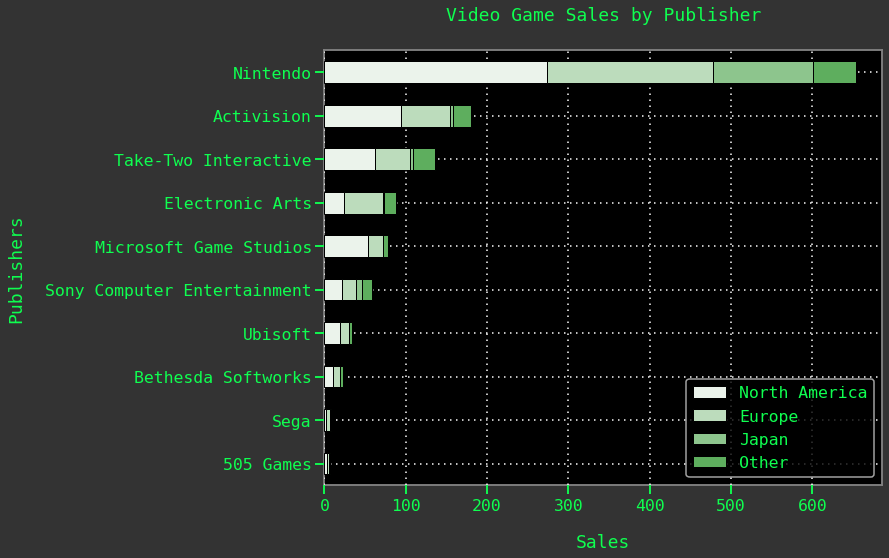

In [140]:
# Create a stacked column chart to show each publisher's sales per region
# - Sort the bars by the Global Sales column
# - But don't include the Global Sales column
# Use a black outline (edgecolor) around each stacked bin to distiquish more
# Show bins on top of grid (zorder)
pub_reg_sales_df.sort_values(by='Global_Sales', ascending=True).drop('Global_Sales', axis=1).plot(kind='barh', stacked=True, edgecolor="k", linewidth=1, zorder=3, figsize=(10,8))

# Edit legend labels
plt.legend(['North America', 'Europe', 'Japan', 'Other'], loc='best')

# plt.margins(0)
plt.title('Video Game Sales by Publisher', fontdict={'fontsize': 18}, pad=30)
plt.xlabel('Sales', labelpad=20)
plt.ylabel('Publishers', labelpad=20)

> <br>
> Based on this stacked bar chart, Nintendo has the highest global sales.
>
> The top 5 publishers are 
>
> * Nintendo
> * Activision
> * Take-Two Interactive
> * Electronic Arts
> * Microsoft Game Studios.
> <br><br>

### 2. Global Sales by Year

Here is a line chart showing the total global sales for each year.

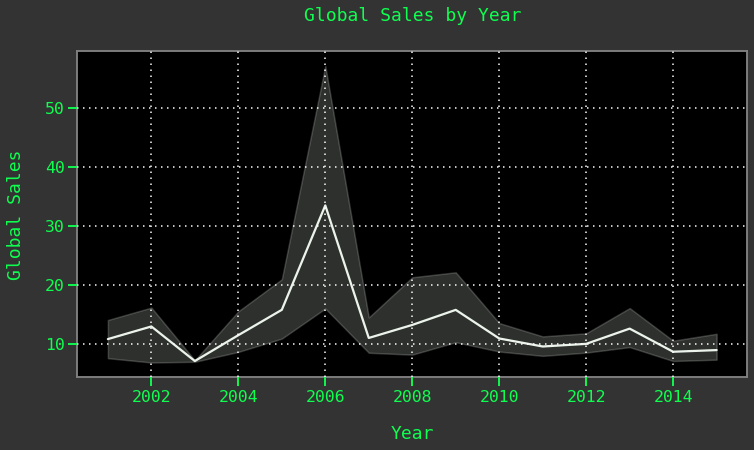

In [126]:
plt.figure(figsize=(12,6))

sns.lineplot(data=gs_df, x='Year', y='Global_Sales')

plt.title('Global Sales by Year', fontdict={'fontsize': 18}, pad=30)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Global Sales', labelpad=20)
plt.show()

> <br>
> Based on the line chart, the highest global sales were in 2006.
> <br><br>

### 3. Global Sales Distribution for Action Games

Here is a histogram showing the global sales distribution for games with Action as the genre.

Text(0, 0.5, 'Global Sales')

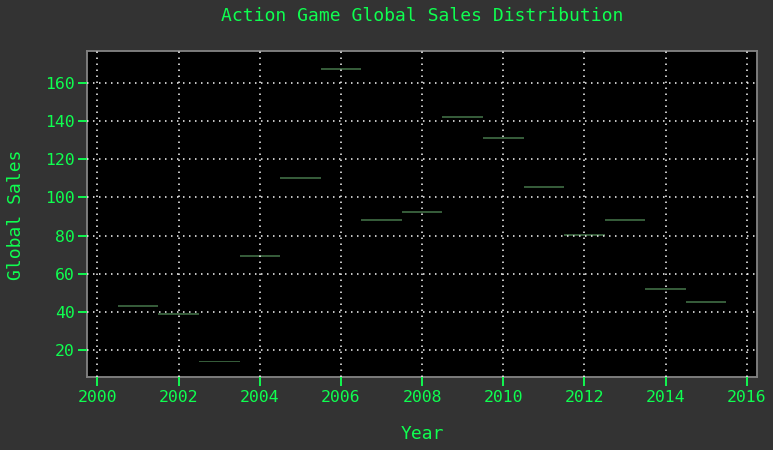

In [103]:
# Create a new DataFrame with the Year as the index and the Global Sales as the column
yearly_global_sales_df = pd.DataFrame(gs_df.groupby('Year')['Global_Sales'].sum())
# yearly_global_sales_df.head(15)
# yearly_global_sales_df.shape
# yearly_global_sales_df.info()

plt.figure(figsize=(12,6))

# Create histogram of the yearly sales with years on the x-axis
sns.histplot(data=yearly_global_sales_df, x=yearly_global_sales_df.index, y=yearly_global_sales_df.Global_Sales, discrete = True, color='#0FFF50', alpha=1.0, fill=True)

# Bar chart kinda looks better perhaps
# sns.barplot(data=yearly_global_sales_df, x=yearly_global_sales_df.index, y=yearly_global_sales_df.Global_Sales)

plt.title('Action Game Global Sales Distribution', fontdict={'fontsize': 18}, pad=30)
plt.xlabel('Year', labelpad=20)
plt.ylabel('Global Sales', labelpad=20)

> <br>
> Based on this histogram chart, it looks like Action games sales where on the decline between 2009 and 2016.
> <br><br>

### 4. North American Sales by Genre

Here is a pie chart showing the percentage of sales for each genre in the North American market.

Note: Smaller "slices" with less than 5% sales are grouped together into the "other" category to create an easier to read chart.

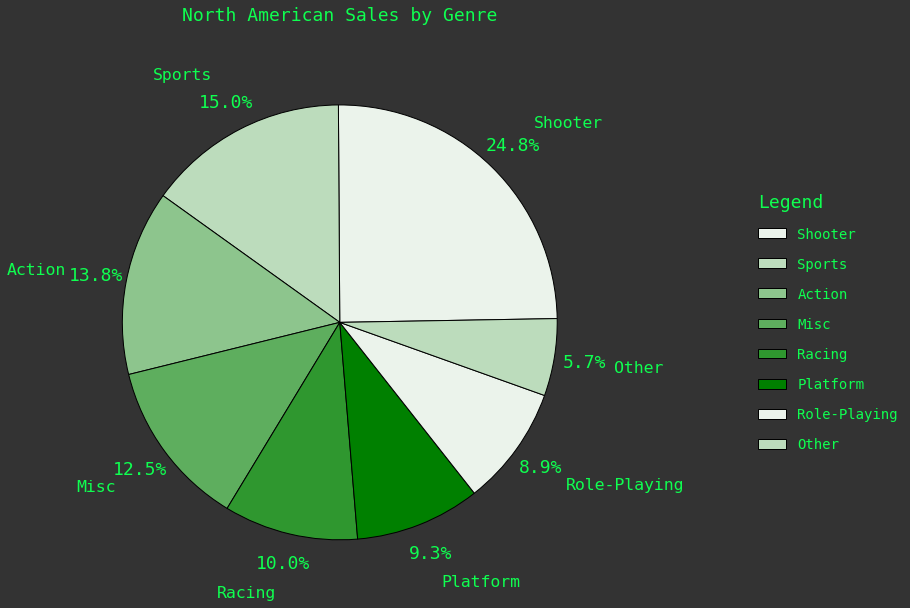

There are 3 genres included in the North America Other category (less than 5 percent of total sales):
Simulation :  14.61
Fighting :  14.4
Puzzle :  3.44


In [129]:
# Get all games sold in North America and group them by genre
na_games = gs_df[gs_df['NA_Sales'] > 0]
na_games_by_genre = na_games.groupby('Genre')['NA_Sales'].sum()

# Sort genres by total sales in descending order
na_games_by_genre.sort_values(ascending=False, inplace=True)

# Group smaller genres into a single 'Other' category
# - Get the sum of the sales for all genres with less than 5% of the total sales
# - Create a new row in the DataFrame with the 'Other' genre and the sum of the sales
# - Drop all the rows with genres that have less than 5% of the total sales
na_other_sales = na_games_by_genre[na_games_by_genre < na_games_by_genre.sum() * 0.05].sum()
na_games_by_genre.loc['Other'] = na_other_sales
na_games_by_genre_with_others = na_games_by_genre.drop(na_games_by_genre[na_games_by_genre < na_games_by_genre.sum() * 0.05].index)

# Show a pie chart of the North American sales by genre
na_games_by_genre_with_others.plot(kind='pie', 
                                   autopct='%1.1f%%', 
                                   figsize=(10, 10), 
                                   legend=True, 
                                   ylabel='', 
                                   pctdistance=1.14, 
                                   labeldistance=1.28,
                                   startangle=1,
                                   radius=1,
                                   wedgeprops = {'linewidth': 1, 'edgecolor': 'k'})

plt.title('North American Sales by Genre', fontdict={'fontsize': 18}, pad=30)
leg = plt.legend(loc='center right', fontsize=14, frameon=False, bbox_to_anchor=(1.55, 0.5), title="Legend", labelspacing=1.15)
leg._legend_box.align = "left"
plt.show()

# Get Genres with sales under 5% of the total sales
na_smaller_genres = na_games_by_genre[na_games_by_genre < na_games_by_genre.sum() * 0.05]

# Get the length of the 'Other' category
print(f'There are {len(na_smaller_genres)} genres included in the North America Other category (less than 5 percent of total sales):')

# Print each of the smaller_genres and their sales
for genre, sales in na_smaller_genres.items():
    print(genre, ': ', sales)

> <br>
> Based on this pie chart the top 3 genres in North America are:
> 
> * Shooter (24.8%)
> * Sports (15.0%)
> * Action (13.8%).
> 
> And there are 3 genres included in the North America "Other" category (less than 5 percent of total sales):
> 
> * Simulation :  14.61 sales
> * Fighting :  14.4 sales
> * Puzzle :  3.44 sales
> <br><br>

### 5. European Sales by Genre

Here is a pie chart to show the percentage of sales for each genre in the European market.

Note: Smaller "slices" with less than 5% sales are grouped together into the "other" category to create an easier to read chart.

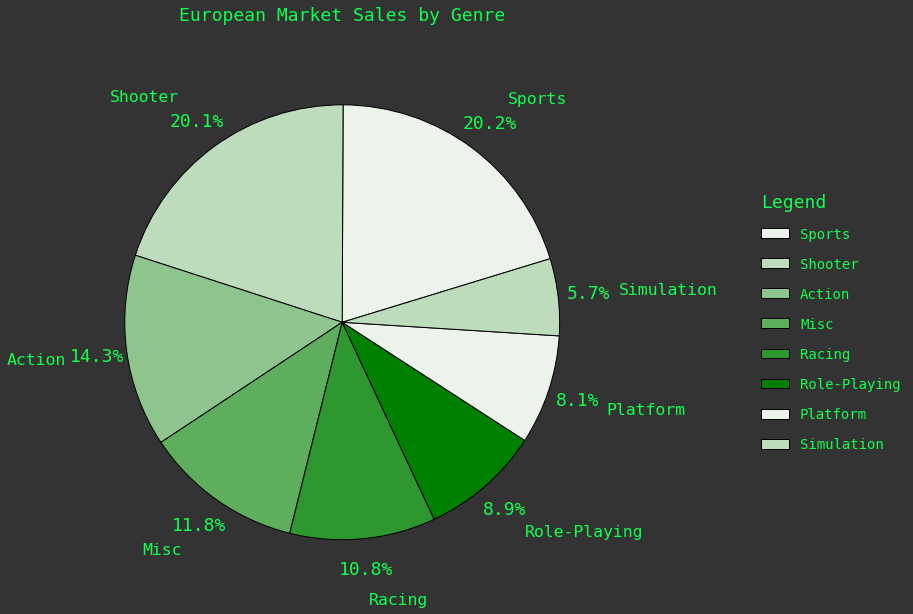

There are 3 genres included in the European Other category (less than 5 percent of total sales):
Puzzle :  5.36
Fighting :  5.0
Other :  10.36


In [105]:
# Get all games sold in Europe and group them by genre
eu_games = gs_df[gs_df['EU_Sales'] > 0]
eu_games_by_genre = eu_games.groupby('Genre')['EU_Sales'].sum()

# Sort genres by total sales in descending order
eu_games_by_genre.sort_values(ascending=False, inplace=True)

# Group smaller genres into a single 'Other' category
# - Get the sum of the sales for all genres with less than 5% of the total sales
# - Create a new row in the DataFrame with the 'Other' genre and the sum of the sales
# - Drop all the rows with genres that have less than 5% of the total sales
eu_other_sales = eu_games_by_genre[eu_games_by_genre < eu_games_by_genre.sum() * 0.05].sum()
eu_games_by_genre.loc['Other'] = eu_other_sales
eu_games_by_genre_with_others = eu_games_by_genre.drop(eu_games_by_genre[eu_games_by_genre < eu_games_by_genre.sum() * 0.05].index)

# Show a pie chart of the European sales by genre
eu_games_by_genre_with_others.plot(kind='pie', 
                                   autopct='%1.1f%%', 
                                   figsize=(10, 10), 
                                   legend=True, 
                                   ylabel='', 
                                   pctdistance=1.14, 
                                   labeldistance=1.28,
                                   startangle=17,
                                   radius=1,
                                   wedgeprops = {'linewidth': 1, 'edgecolor': 'k'})

plt.title('European Market Sales by Genre', fontdict={'fontsize': 18}, pad=30)
leg = plt.legend(loc='center right', fontsize=14, frameon=False, bbox_to_anchor=(1.55, 0.5), title="Legend", labelspacing=1.15)
leg._legend_box.align = "left"
plt.show()

# Get Genres with sales under 5% of the total sales
eu_smaller_genres = eu_games_by_genre[eu_games_by_genre < eu_games_by_genre.sum() * 0.05]

# Get the length of the 'Other' category
print(f'There are {len(eu_smaller_genres)} genres included in the European Other category (less than 5 percent of total sales):')

# Print each of the eu_smaller_genres and their sales
for genre, sales in eu_smaller_genres.items():
    print(genre, ': ', sales)

> <br>
> Based on this pie chart the top 3 genres in Europe are:
> 
> * Sports (20.2%)
> * Shooter (20.1%)
> * Action (14.3%)
> 
> And there are 3 genres included in the European "Other" category (less than 5 percent of total sales):
> 
> * Puzzle :  5.36 sales
> * Fighting :  5.0 sales
> * Other :  10.36 sales
> <br><br>

### 6. Explain differences and similarities between the North American and European charts in markdown.

> <br>
> Difference between the North American and European charts are:
> 
>   * The top 3 genres are different
>     * North America: Shooter, Sports, Action
>     * Europe: Sports, Shooter, Action
>   * The "Other" category is different
>     * North America: Simulation, Fighting, Puzzle
>     * Europe: Puzzle, Fighting, Other
>
> Similarities between the North American and European charts are:
>
>   * The top 3 genres in each region include Shooter, Sports, and Action, just in a different order.
>   * The "Other" category in each region includes Puzzle and Fighting.
> <br><br>

### 7. Count of Games by Platform

Here is a bar chart showing the total number of games created for each platform in the dataset.

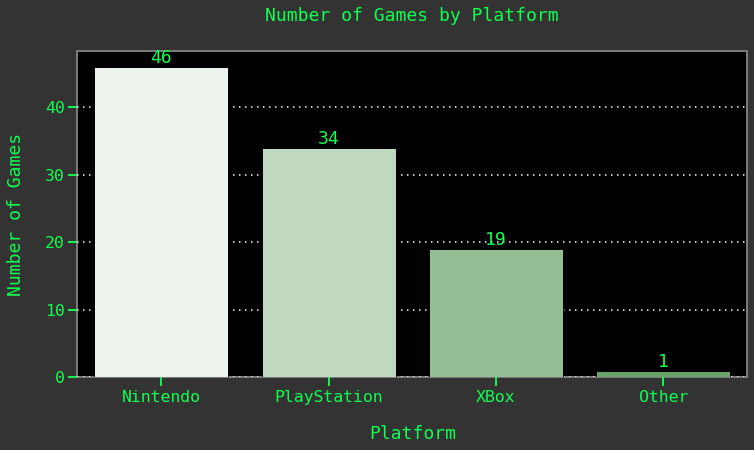

In [130]:
# Create a DataFrame with the total number of games created for each platform
platforms_df = gs_df.groupby('Platform')['Name'].count()

# Sort the DataFrame by the number of games in descending order
platforms_df.sort_values(ascending=False, inplace=True)

plt.figure(figsize=(12,6))

# Create a bar chart of the total number of games created for each platform
sns.barplot(x=platforms_df.index, y=platforms_df.values, edgecolor="k", linewidth=1, zorder=3)

# Add value labels to each bar
for index, value in enumerate(platforms_df.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.title('Number of Games by Platform', fontdict={'fontsize': 18}, pad=30)
plt.xlabel('Platform', labelpad=20)
plt.ylabel('Number of Games', labelpad=20)
plt.show()

> <br>
> Based on the chart, the top 3 platforms are:
>
> * Ninetendo (46)
> * PlayStation (34)
> * Xbox (19)
><br><br>

## Extra Credit

### 1. Determine the appropriate charts to answer the following questions

* What genre of game is present the most in the top 100 games from 2000-2015?

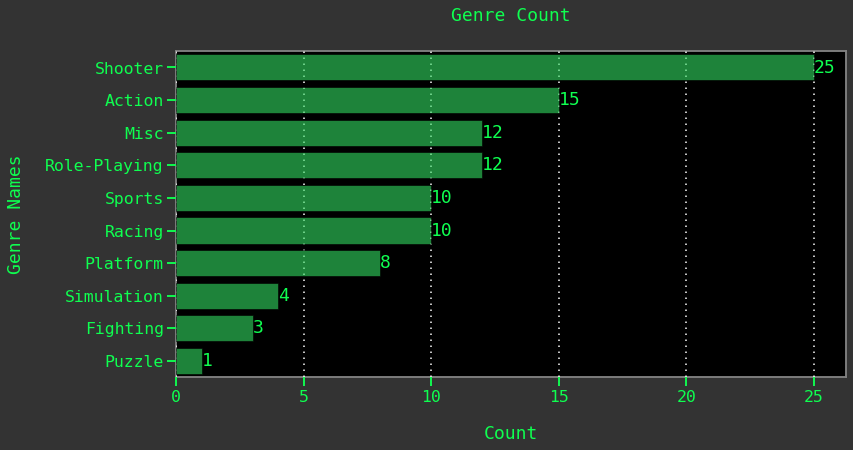

In [131]:
# Create a plot to show the genres that appears most often in the dataset
plt.figure(figsize=(12,6))

sns.countplot(y='Genre', data=gs_df, order=gs_df['Genre'].value_counts().iloc[:len(genres)].index, color="#0FFF50", saturation=0.7, alpha=0.6, edgecolor="k", linewidth=1, zorder=3)

# Add count value labels to each bar
for index, value in enumerate(gs_df['Genre'].value_counts().iloc[:len(genres)].values):
    plt.text(value, index, str(value), ha='left', va='center')

plt.title('Genre Count', fontdict={'fontsize': 18}, pad=30)
plt.xlabel('Count', labelpad=20)
plt.ylabel('Genre Names', labelpad=20)
plt.show()

> <br>
> Result: The genre of game most present is Shooter with 25 games.
> <br><br>

* What percentage of global sales does PlayStation have in the dataset?

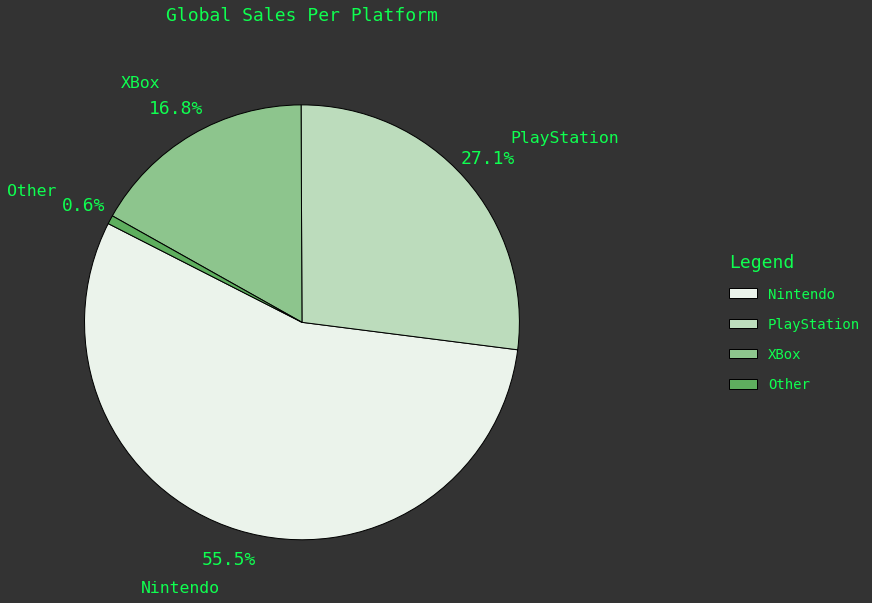

In [108]:
# Create a pie chart that shows the percentage of global sales for each platform
global_sales_by_platform = gs_df.groupby('Platform')['Global_Sales'].sum()

# Sort platforms by total sales in descending order
global_sales_by_platform.sort_values(ascending=False, inplace=True)

global_sales_by_platform.plot(kind='pie', 
                                   autopct='%1.1f%%', 
                                   figsize=(10, 10), 
                                   legend=True, 
                                   ylabel='', 
                                   pctdistance=1.14, 
                                   labeldistance=1.28,
                                   startangle=153,
                                   radius=1,
                                   wedgeprops = {'linewidth': 1, 'edgecolor': 'k'})

plt.title('Global Sales Per Platform', fontdict={'fontsize': 18}, pad=30)
leg = plt.legend(loc='center right', fontsize=14, frameon=False, bbox_to_anchor=(1.55, 0.5), title="Legend", labelspacing=1.15)
leg._legend_box.align = "left"
plt.show()

> <br>
> Result: The percentage of PlayStation sales to Global Sales is 27.1%.
> <br><br>

* What is the distribution of sales for Shooter games?

          Region   Sales
0  North America  140.44
1         Europe   81.63
3          Other   29.09
2          Japan    4.88


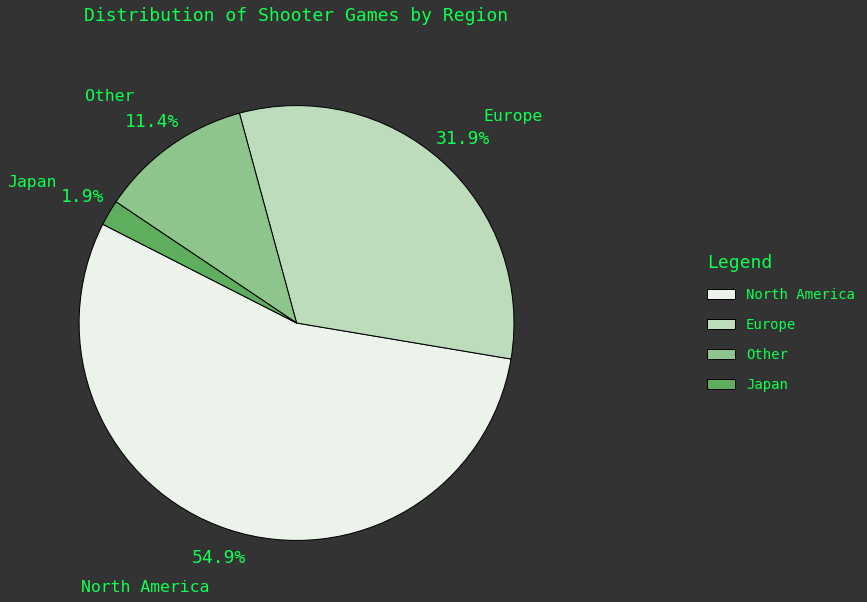

In [109]:
# Create a pie chart that shows the distribution of Shooter games by region

# Get all Shooter games
shooter_games = gs_df[gs_df['Genre'] == 'Shooter']

# Get the total sales for each region
na_sales = shooter_games['NA_Sales'].sum()
eu_sales = shooter_games['EU_Sales'].sum()
jp_sales = shooter_games['JP_Sales'].sum()
other_sales = shooter_games['Other_Sales'].sum()

# Create a DataFrame with the total sales for each region
shooter_sales_df = pd.DataFrame({'Region': ['North America', 'Europe', 'Japan', 'Other'], 'Sales': [na_sales, eu_sales, jp_sales, other_sales]})

# Sort the DataFrame by the total sales in descending order
shooter_sales_df.sort_values(by='Sales', ascending=False, inplace=True)

# Check the DataFrame
print(shooter_sales_df)

# Create the labels for the pie chart
labels = shooter_sales_df['Region']

# Create the pie chart
shooter_sales_df.plot(kind='pie',
                      y='Sales',
                      labels=labels,
                      autopct='%1.1f%%', 
                      figsize=(10, 10), 
                      legend=True, 
                      ylabel='', 
                      pctdistance=1.14, 
                      labeldistance=1.28,
                      startangle=153,
                      radius=1,
                      wedgeprops = {'linewidth': 1, 'edgecolor': 'k'})

plt.title('Distribution of Shooter Games by Region', fontdict={'fontsize': 18}, pad=30)
leg = plt.legend(loc='center right', fontsize=14, frameon=False, bbox_to_anchor=(1.55, 0.5), title="Legend", labelspacing=1.15)
leg._legend_box.align = "left"
plt.show()

> <br>
> Result: The regional distribution of Shooter game sales is:
> 
> * North America  140.44 (54.9%)
> * Europe   81.63 (31.9%)
> * Other   29.09 (11.4%)
> * Japan    4.88 (1.9%)
> <br><br>

### 2. Explain each chart using markdown. Make sure to answer the questions.

Done above.

### 3. Use color and line options to override default chart designs for all charts.

Added Chart Design Theme Values section towards the top of this file and set a CRT 'green screen' computer monitor color theme.

Not the best for accessibility, but kinda fun :p